## Partie 1 : Traitement de données
Notre objectif est de manipuler et de traiter le jeu de données (contenu dans le fichier `songs.csv`) des chansons les plus écoutées sur Spotify en 2024. Nos traitement serviront ensuite à entraîner un modèle simple de régression linéaire pour la prédiction du nombre total d'écoutes d'une chanson sur Spotify.

### Somaire
1. [Chargement du jeu de données](#1-chargement-du-jeu-de-données)
2. [Exploration des données](#2-exploration-des-données)
3. [Nettoyage des données](#3-nettoyage-des-données)
4. [Extraction de données](#4-extraction-de-données)
5. [Conversion de données](#5-conversion-des-données)
6. [Visualisation de données](#6-visualisation-de-données)
7. [Matrice de corrélation](#7-matrice-de-corrélation)
8. [Entraînement d'un modèle de régression](#8-entraînement-dun-modèle-de-régression-linéaire)

#### Installation et importation des librairies
Avant de commencer, nous devons lancer la cellule ci-bas afin de s'assurer que nous avons accès aux  librairies nécessaires.

In [20]:
%pip install pandas matplotlib plotly seaborn scikit-learn

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import linear_model

Note: you may need to restart the kernel to use updated packages.


#### 1. Chargement du jeu de données
Chargez le jeu de données dans un [`DataFrame Pandas`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame), depuis le fichier CSV `songs.csv`.
Utilisez la méthode `read_csv()`.

In [21]:
# TODO: Charger le jeu de données dans un objet DataFrame.
data_frame= pd.read_csv("songs.csv")

In [22]:
# TODO: Afficher les premières lignes du DataFrame pour comprendre la structure des données.
data_frame.iloc[:6,:]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
5,Lovin On Me,Lovin On Me,Jack Harlow,11/10/2023,USAT22311371,6,410.1,"670,665,438","105,892","175,421,034",...,"4,654",86.0,"17,167,254",152.0,"138,529,362","50,982","9,438,601","4,517,131",NaN,1


#### 2. Exploration des données
Affichez le nombre d'éléments (lignes) du jeu de données. Et, affichez les types de données de chaque colonne pour vérifier si nous avons besoin d'effectuer d'éventuelles nettoyage ou conversion.

In [23]:
# TODO: Afficher le nombre d'éléments.
print(f"Le nombre de ligne du jeu de donnée est de {len(data_frame)}")


#TODO: Afficher les types de données de chaque colonne.
print(data_frame.dtypes)


Le nombre de ligne du jeu de donnée est de 4600
Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams                object
Spotify Playlist Count         object
Spotify Playlist Reach         object
Spotify Popularity            float64
YouTube Views                  object
YouTube Likes                  object
TikTok Posts                   object
TikTok Likes                   object
TikTok Views                   object
YouTube Playlist Reach         object
Apple Music Playlist Count    float64
AirPlay Spins                  object
SiriusXM Spins                 object
Deezer Playlist Count         float64
Deezer Playlist Reach          object
Amazon Playlist Count         float64
Pandora Streams                object
Pandora Track Stations         object
So

#### 3. Nettoyage des données
Pour procéder au nettoyage de nos données, nous allons :
- Supprimer les colonnes inutiles ;
- Analyser les valeurs manquantes ;
- Gérer les valeurs manquantes.

Les méthodes utiles pour cette section sont : `drop()`, `isna()`, `dropna()`.

In [24]:
# TODO: Utiliser drop() pour supprimer les colonnes "ISRC" et "TIDAL Popularity".
data_frame.drop(columns=["ISRC","TIDAL Popularity"], inplace=True)


In [25]:
# TODO: Pour chaque colonne, afficher la somme des valeurs manquantes (utiliser isna()).
data_frame.isna().sum()

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
Explicit Track                   0
dtype: int64

In [26]:
# TODO: Supprimer les lignes contenant des valeurs manquantes (utiliser dropna()).
data_frame.dropna(axis = 'index', how = 'any', inplace=True)
# TODO: Afficher la nouvelle dimension du DataFrame.
print(data_frame.shape)

(565, 27)


#### 4. Extraction de données
Nous souhaitons extraire l'année de sortie à partir de la date de sortie, et créer une nouvelle colonne "Release Year" basée sur cette donnée. Utilisez `to_datetime()` pour extraire l'année depuis la date et `apply()` pour appliquer l'extraction sur un ensemble de données.

In [27]:
# TODO: Créer une colonne "Release Year" contenant l'année de sortie pour chacune des chansons.
data_frame["Release Year" ]= data_frame["Release Date"].apply(lambda x: pd.to_datetime(x,dayfirst=True)).dt.year


/var/folders/5f/s1pv6spn5hv0ymdd_6zy0dqr0000gn/T/ipykernel_9328/1164967596.py:2: UserWarning:

Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.



#### 5. Conversion de données
Lors de l'étape d'[exploration de données](#2-exploration-des-données), nous avons remarqué que certaines colonnes sont de type `object` alors qu'elles représentent des données numériques. Nous allons donc convertir ces colonnes en `float` (utilisez `apply()` pour appliquer la conversion sur un ensemble de données).

Omettre de la conversion les colonnes : "Track", "Album Name", "Artist", "Release Date".

In [28]:
# TODO: Afficher les colonnes à convertir en 'float'.
data_frame_float=data_frame.select_dtypes(include=["object"]).iloc[ : , 4: ]

print(data_frame_float.columns)

# TODO: Convertir les données des colonnes en 'float'.
for col in data_frame_float.columns:
    data_frame[col]=data_frame[col].apply(lambda x: float(x.replace(",", "")))



Index(['All Time Rank', 'Spotify Streams', 'Spotify Playlist Count',
       'Spotify Playlist Reach', 'YouTube Views', 'YouTube Likes',
       'TikTok Posts', 'TikTok Likes', 'TikTok Views',
       'YouTube Playlist Reach', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Reach', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts'],
      dtype='object')


In [29]:
# TODO: Afficher les types de données de chaque colonne.
data_frame.dtypes

Track                          object
Album Name                     object
Artist                         object
Release Date                   object
All Time Rank                 float64
Track Score                   float64
Spotify Streams               float64
Spotify Playlist Count        float64
Spotify Playlist Reach        float64
Spotify Popularity            float64
YouTube Views                 float64
YouTube Likes                 float64
TikTok Posts                  float64
TikTok Likes                  float64
TikTok Views                  float64
YouTube Playlist Reach        float64
Apple Music Playlist Count    float64
AirPlay Spins                 float64
SiriusXM Spins                float64
Deezer Playlist Count         float64
Deezer Playlist Reach         float64
Amazon Playlist Count         float64
Pandora Streams               float64
Pandora Track Stations        float64
Soundcloud Streams            float64
Shazam Counts                 float64
Explicit Tra

#### 6. Visualisation de données
Nous aimerions visualiser nos données via :
- un graphique en secteur avec la proportion du nombre d'écoutes Spotify en 2024 par année de sortie ;
- un histogramme avec la proportion de chanson à contenu explicite par année de sortie ;
- un diagramme à barres avec le top 10 des chansons les plus écoutées sur Spotify en 2024.

Pour cela, utilisez les méthodes `pie()`, `histogram()` et `bar()` de Plotly Express (accessible via l'objet `px`).

In [30]:
# TODO: Afficher un DataFrame contenant seulement les colonnes "Release Year", "Spotify Streams".
data_release_streams=data_frame[["Release Year","Spotify Streams"]].groupby("Release Year").sum().reset_index()

data_release_streams

In [31]:
# TODO: Afficher un graphique en secteur représentant le nombre d'écoutes Spotify en 2024 par année de sortie.
fig_1=px.pie(data_release_streams,values="Spotify Streams",names="Spotify Streams", title= "Nombre d'écoutes Spotify en 2024 par année de sortie" )
fig_1.show()

In [32]:
# TODO: Afficher un histogramme représentant la proportion de chanson à contenu explicite par année de sortie.


fig_2 = px.histogram(data_frame, x="Release Year", color="Explicit Track")
fig_2.show()

In [33]:
# TODO : Afficher un diagramme à barres avec le top 10 des chansons les plus écoutées en 2024.
data_frame_barre= data_frame[["Track","Spotify Streams"]].sort_values(by="Spotify Streams", ascending=False).iloc[: 10 , :]
fig_3= px.bar(data_frame_barre,x="Track", y="Spotify Streams",text="Spotify Streams",text_auto=True,title="Top 10 des chansons les plus écoutées sur Spotify en 2024")
fig_3.show()

#### 7. Matrice de corrélation
Afin de comprendre la relation entre les différentes colonnes numériques, nous voulons construire une matrice de corrélation. Cette matrice nous permet de mesurer le lien de dépendance entre chaque colonne 1 à 1.

Utilisez la méthode `corr()` sur les colonnes numériques du DataFrame pour construire une matrice, et affichez la matrice avec `heatmap()` de Seaborn (accessible via l'objet `sns`).

<Axes: >

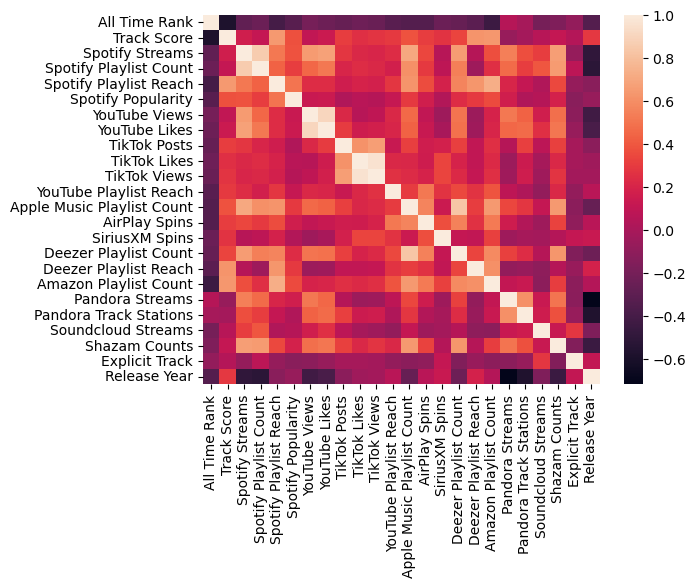

In [34]:
# TODO: Afficher la matrice de corrélation entre les colonnes numériques du jeu de données.
data_coorelation_numerique= data_frame.select_dtypes(include=["float", "int"]).corr()
sns.heatmap(data_coorelation_numerique)


#### 8. Entraînement d'un modèle de régression linéaire
Nous allons procéder à l'entraînement d'un modèle de regression linéaire pour prédire le nombre d'écoutes d'une chanson sur Spotify.

Cela consiste à apprendre d'une relation entre des données d'entrée et des résultats souhaités (ici on parle d'une relation entre toutes les colonnes décrivant une chanson et la colonne "Spotify Streams"). 

On veut diviser nos données en 2 ensembles distincts afin d'utiliser une partie pour que notre modèle apprenne des relations entre les entrées et le résulat, et l'autre partie pour tester la performance de notre modèle.

In [35]:

# TODO: Compléter data_test et data_train. Séparer le jeu de données de base en 2, 
#       on utilise la 1ère moitié pour initialiser data_test et l'autre pour data_train.
#       Les champs X correspondent aux données d'entrée (toutes les colonnes numériques sauf "Spotify Streams").
#       Les champs Y correspondent au résultat souhaité (soit la colonne "Spotify Streams").



data_numerique= data_frame.select_dtypes(include=["float","int"]) #dataframe avec colonnes numériques
data_train = {"X": data_numerique.drop(columns=["Spotify Streams"]).iloc[:len(data_frame)//2] , "Y":   data_numerique[["Spotify Streams"]].iloc[:len(data_frame)//2]}
data_test = {"X":data_numerique.drop(columns=["Spotify Streams"]).iloc[len(data_frame)//2:] , "Y":   data_numerique[["Spotify Streams"]].iloc[ len(data_frame)//2 :]}





,All Time Rank,Track Score,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track,Release Year
0,1.0,725.4,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,5767700.0,651565900.0,5.332282e+09,...,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,0,2024
1,2.0,545.9,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,674700.0,35223547.0,2.083390e+08,...,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279.0,1,2024
2,3.0,538.4,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,3025400.0,275154237.0,3.369121e+09,...,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340.0,0,2024
5,6.0,410.1,105892.0,175421034.0,83.0,1.311481e+08,1392593.0,4202367.0,214943489.0,2.938687e+09,...,4654.0,86.0,17167254.0,152.0,138529362.0,50982.0,9438601.0,4517131.0,1,2023
9,10.0,330.6,10400.0,184199419.0,86.0,3.273524e+07,988682.0,325800.0,121574500.0,9.746562e+08,...,117.0,78.0,10800098.0,92.0,1005626.0,842.0,3679709.0,666302.0,1,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,1302.0,41.2,115125.0,20776088.0,65.0,3.656785e+08,2841760.0,80.0,4912.0,9.821000e+04,...,17.0,16.0,78389.0,19.0,267465925.0,32765.0,159665164.0,1739069.0,1,2016
1314,1309.0,41.1,288559.0,72837714.0,77.0,4.103298e+08,2747230.0,185316.0,144066647.0,9.074985e+08,...,51.0,76.0,401696.0,28.0,176739390.0,142939.0,7711539.0,5160420.0,0,2017
1316,1312.0,41.1,129306.0,54219735.0,75.0,1.049660e+09,9224750.0,171618.0,1982231.0,6.028763e+06,...,22.0,72.0,721612.0,29.0,305499151.0,225474.0,1739764.0,11706559.0,0,2016
1319,1313.0,41.1,87667.0,24084151.0,65.0,1.601099e+09,7360323.0,1069767.0,28595817.0,2.334194e+08,...,69.0,57.0,239183.0,39.0,107237615.0,37694.0,446194.0,7039145.0,0,2017


In [36]:
regression = linear_model.LinearRegression() # Instanciation du modèle de régression linéaire.
# TODO: Entraîner le modèle en appelant la méthode fit() sur la regression,
#       et en passant les données entraînements (entrées et résultat attendu) à cette méthode.
regression.fit(data_train["X"], data_train["Y"])
# TODO: Faire des prédictions de résultat à partir des données d'entrée de test,
#       en appelant la méthode predict() sur la regression.
#       Mettre les prédictions dans data_test["Y_pred"].
data_test["Y_pred"]= regression.predict(data_test["X"])



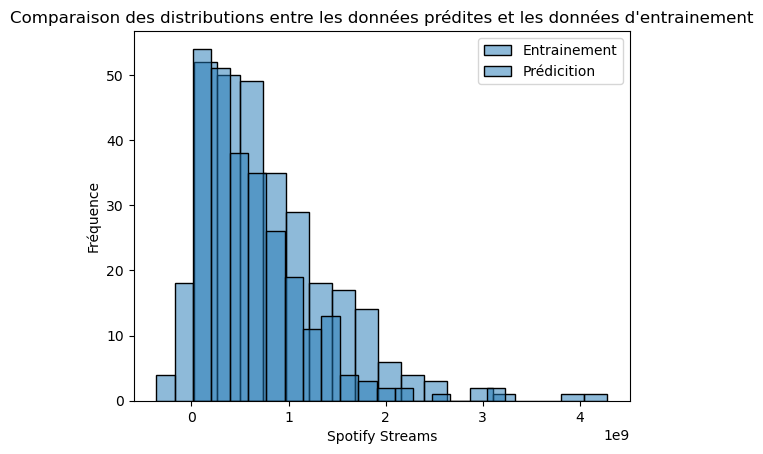

In [40]:
# TODO: Comparer la distribution des données prédites avec celles d'entraînement via un histogramme.
sns.histplot(data_train["Y"],label="Entrainement")
sns.histplot(data_test["Y_pred"], label="Prédicition")

plt.xlabel("Spotify Streams")
plt.ylabel("Fréquence")
plt.title("Comparaison des distributions entre les données prédites et les données d'entrainement")
plt.legend()
plt.show()


